In [1]:
import networkx as nx
import matplotlib.pyplot as plt

To know how a network was formed, we have to observe some of its properties (node distribution), and try to come up with a model (hypothesis = assumptions) that would generate similar properties.

# Preferential Attachment model

### Degree distribution

In [2]:
G = nx.les_miserables_graph()

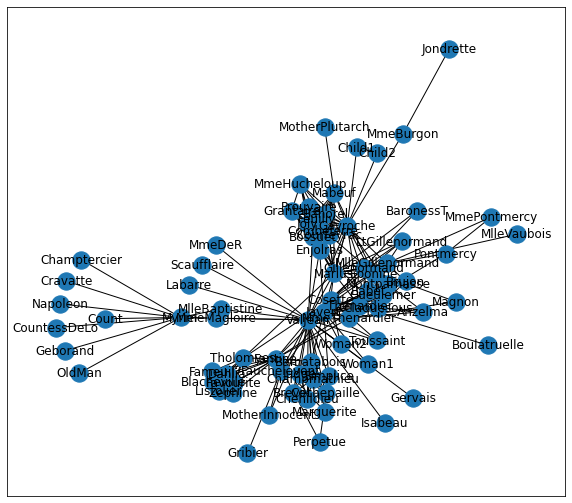

In [4]:
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

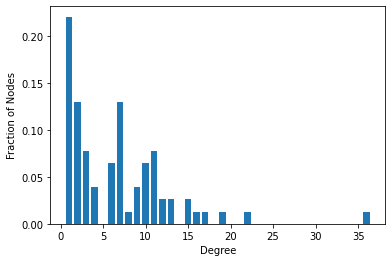

In [9]:
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))

histogram = [list(degress.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values]

plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

### Power Law distributions
When plotting frequencies on log-log scales (x and y axes are both in log scales), and the distribution follows vaguely a straight line, we say the distribution follows a power law = a few nodes having very high degree, and many many node having very low degree (long tail).

P(k) = Ck^-alpha

<img src='img/power_law.png'/>

*How are such networks / distributions happen?*  => Can we find a set of basic assumptions that explain this phenomenon?

## Preferential attachment model

Create a node, and attach it to one of the existing nodes randomly, but the probability is proportional to the node's degree. "Rich gets Richer" phenomenon => Power Law

**Produces a power law distribution**

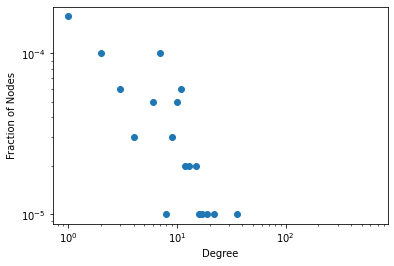

In [24]:
G = nx.barabasi_albert_graph(100000, 1) # n nodes, m new connections for the new node
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))

histogram = [list(degress.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values]

plt.plot(degree_values, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Small World Networks

Six degrees of separation: MSN [Leskovec and Horvitz, 2008], Facebook [Backstrom et al 2012]

Small world networks have two properties:
- the median shortest path between any two nodes is small (single digit)
- Average Clustering coefficients are high (people are well connected locally)

Preferential attachment model generates the first property (thanks to the formation of hubs), but doesn't promote the second (no mechanism to favor triads formation)

### Small world model:
1. Start with a ring of n nodes, where each node is connected to its k nearest neighbors
2. Fix a param p between 0 and 1
3. Consider each edge (u, v). With probability p, select a node w at random and rewire the edge (u, v) so it becomes (u, w)

As p changes: 
- p = 0 => Lattice (high ratio of triads, but long shortest paths)
- p = 1 => basically every edge is random, we lose the structure (triads)

In betweeen

In [34]:
SmallworldG = nx.watts_strogatz_graph(900, 6, 0.04)

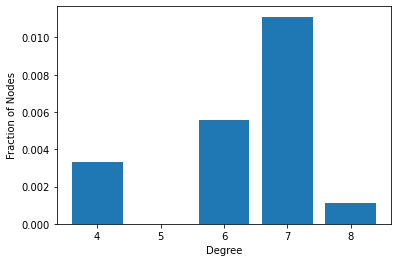

In [35]:
degrees = dict(SmallworldG.degree())
degree_values = sorted(set(degrees.values()))

histogram = [list(degress.values()).count(i) / float(nx.number_of_nodes(SmallworldG)) for i in degree_values]

plt.bar(degree_values, histogram,)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

* `connected_watts_strogatz_graph(n, k, p, t)` runs Watts-Strogats algorithm T times until it returns a connected graph.
* `newman_watts_strogatz_graph(n, k, p)` runs a similar model but rather than rewiring edges, new edges are added with probability p

# Link Prediction

(~ Recommendations)

### Number of common neighbors (triad closure) 

In [45]:
G = nx.les_miserables_graph()

In [41]:
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1])))) for e in nx.non_edges(G)]

In [44]:
sorted(common_neigh, key=lambda x: -x[2])[:10]

[('Gavroche', 'Eponine', 8),
 ('Gavroche', 'Claquesous', 8),
 ('Prouvaire', 'Mabeuf', 8),
 ('Prouvaire', 'Marius', 8),
 ('Grantaire', 'Mabeuf', 8),
 ('Grantaire', 'Marius', 8),
 ('Valjean', 'Eponine', 7),
 ('Prouvaire', 'MmeHucheloup', 7),
 ('MmeThenardier', 'Montparnasse', 7),
 ('MmeHucheloup', 'Combeferre', 7)]

### Jaccard Coefficient
Same as number of neighbors, but normalizd by the total number of neighbors

In [46]:
sorted(list(nx.jaccard_coefficient(G)), key=lambda x: -x[2])[:10]

[('CountessDeLo', 'Champtercier', 1.0),
 ('CountessDeLo', 'Napoleon', 1.0),
 ('CountessDeLo', 'Count', 1.0),
 ('CountessDeLo', 'Cravatte', 1.0),
 ('CountessDeLo', 'OldMan', 1.0),
 ('CountessDeLo', 'Geborand', 1.0),
 ('MmeDeR', 'Scaufflaire', 1.0),
 ('MmeDeR', 'Isabeau', 1.0),
 ('MmeDeR', 'Labarre', 1.0),
 ('MmeDeR', 'Gervais', 1.0)]

# Resource Allocation Index
: Fraction of a "resource" that a node can send to another through their common neighbor = sum over all common neighbors of 1/degree(neighbor)

In [47]:
sorted(list(nx.resource_allocation_index(G)), key=lambda x: -x[2])[:10]

[('Gavroche', 'Eponine', 0.7369320007477902),
 ('Gavroche', 'Claquesous', 0.669736227824463),
 ('MmeThenardier', 'Gillenormand', 0.6186868686868687),
 ('Valjean', 'Eponine', 0.6171517809675704),
 ('Prouvaire', 'Mabeuf', 0.6144522144522145),
 ('Prouvaire', 'Marius', 0.6144522144522145),
 ('Grantaire', 'Mabeuf', 0.6144522144522145),
 ('Grantaire', 'Marius', 0.6144522144522145),
 ('Javert', 'Eponine', 0.564520202020202),
 ('MlleGillenormand', 'Pontmercy', 0.5526315789473684)]

### Adamic-Adar Index

Same as RAI, but using log of degree instead of degree

In [49]:
sorted(list(nx.adamic_adar_index(G)), key=lambda x: -x[2])[:10]

[('Gavroche', 'Eponine', 3.3448075882825483),
 ('Gavroche', 'Claquesous', 3.1995614899211535),
 ('Prouvaire', 'Mabeuf', 3.1114513083322697),
 ('Prouvaire', 'Marius', 3.1114513083322697),
 ('Grantaire', 'Mabeuf', 3.1114513083322697),
 ('Grantaire', 'Marius', 3.1114513083322697),
 ('Valjean', 'Eponine', 2.8753324825647697),
 ('MmeThenardier', 'Montparnasse', 2.712601034496627),
 ('Prouvaire', 'MmeHucheloup', 2.7116810073870288),
 ('MmeHucheloup', 'Combeferre', 2.7116810073870288)]

## Preferential attachment 
Score = product of number of neighbors (nodes with high degrees are likely to connect)

In [51]:
sorted(list(nx.preferential_attachment(G)), key=lambda x: -x[2])[:10]

[('Valjean', 'Courfeyrac', 468),
 ('Valjean', 'Bahorel', 432),
 ('Valjean', 'Joly', 432),
 ('Valjean', 'Combeferre', 396),
 ('Valjean', 'Mabeuf', 396),
 ('Valjean', 'Eponine', 396),
 ('Valjean', 'Feuilly', 396),
 ('Valjean', 'Grantaire', 360),
 ('Gavroche', 'Fantine', 330),
 ('Tholomyes', 'Valjean', 324)]

# (Local) Community Measure

Some measures consider the community structure of the network for link prediction (Community = subset of nodes)
These measure assume that if a pair of nodes belong to the same commmunity and has many common neighbors in that community then they are likely to form an edge

### The Soundarajan-Hopcroft score 
= common neighbors + bonus (+1 for each common neighbor in the community)

To use `nx.cn_soundarajan_hopcroft(G)`, the nodes must be assinged the "community" attribute (`G.nodes['A']['community'] = 0`)

## Community Resource Allocation

Similar to the normal Resource Allocation, but nodes that do not belong to the community do not contribute to the score

To use `nx.ra_index_soundarajan_hopcroft(G)`, the nodes must be assinged the "community" attribute

# Conclusion

None of this measures really tells you whether or not to predict a link formation, but they can all be input features for a classifier that can be trained to predict the link